<a href="https://colab.research.google.com/github/senagulhan/Kadikoy/blob/main/kadikoy_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- IMPORT LIBRARY AND DATASET

First we started to import libraries that we are needed in this project.

In [254]:
import pandas as pd # for data manipulation
import numpy as np # for fast numerical computations with arrays.
import matplotlib.pyplot as plt # for data visualization
from PIL import Image # for importing images
from IPython.display import display # for display the images
from sklearn.impute import KNNImputer # k nearest for fillin nan values

In [255]:
# import all csv file
df_0_14 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kadıkoy/0-14_yas_cocuk_nufusun_mahallelere_gore_dagilimi_2023.csv")
df_65 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kadıkoy/65_uzeri_nufusun_mahallelere_gore_dagilimi_2023.csv")
df_nufus = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kadıkoy/mahalle-nufuslar-2008-2022.csv")
df_cınsıyet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kadıkoy/mahalle_nufuslarinin_cinsiyete_gore_dagilimi_2023.csv")


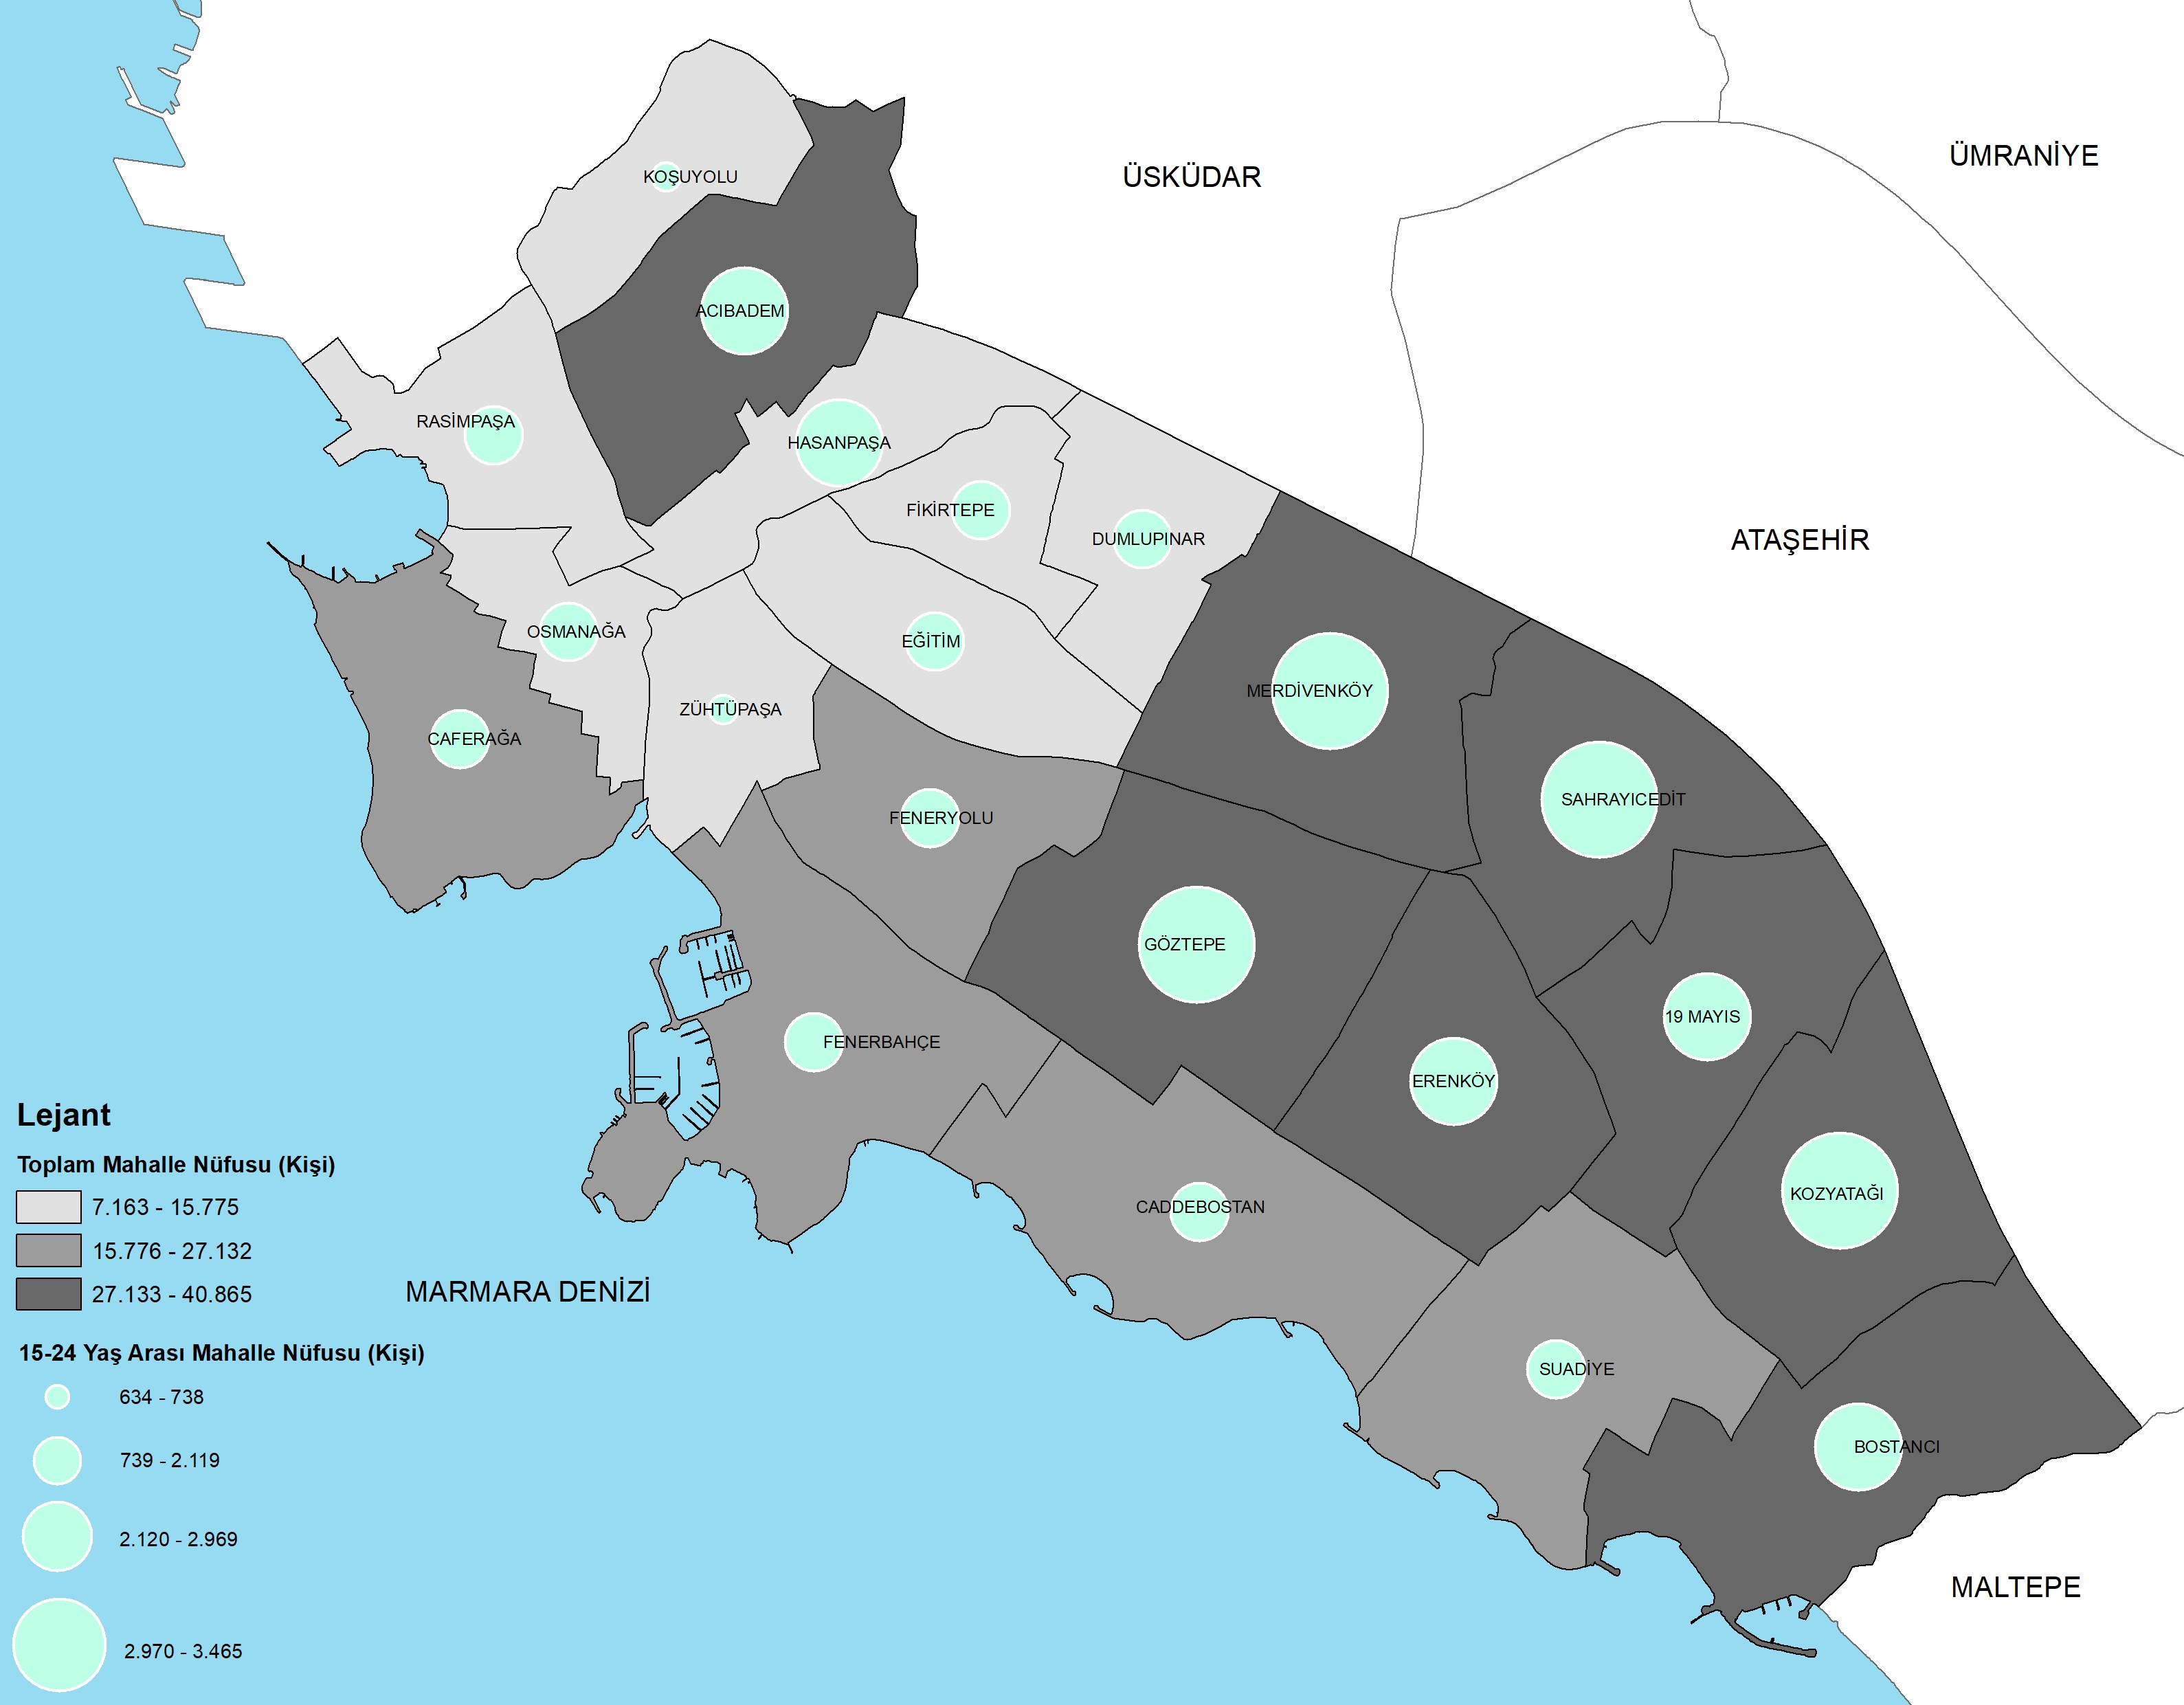

In [256]:
# import and display images
img_15_24 = Image.open('/content/drive/MyDrive/Colab Notebooks/Kadıkoy/15-24-ya-nufusun_mahallelere_gore_dagilimi.jpg')

display(img_15_24)

In [257]:
# convert images as dataframe manually
data_15_24 = {
    'İlçe': ['Koşuyolu', 'Acıbadem', 'Rasimpaşa','Osmanağa', 'Caferağa', 'Zühtüpaşa', 'Eğitim', 'Fikirtepe', 'Dumlupınar' , 'Feneryolu' , 'Fenerbahçe', 'Caddebostan' , 'Göztepe' , 'Merdivenköy' , 'Sahrayıcedit' , 'Erenköy', '19Mayıs' , 'Bostancı' , 'Kozyatağı', 'Suadiye'],
    'Nüfus': ["634-738","2120-2969", "739-2119","739-2119", "739-2119" , "634-738" , "739-2119" , "739-2119" , "739-2119" , "739-2119" , "739-2119" ,"739-2119", "2970-3465" , "2970-3465" , "2970-3465 ", "2120-2969" , "2120-2969" ,"2120-2969" , "2970-3465" ,"739-2119"]
}
df_15_24 = pd.DataFrame(data_15_24)

# split the müfus column into upper limit and lower limit as Alt sınır and Üst sınır
df_15_24[['Alt_Sınır', 'Üst_Sınır']] = df_15_24['Nüfus'].str.split('-', expand=True).astype(int)



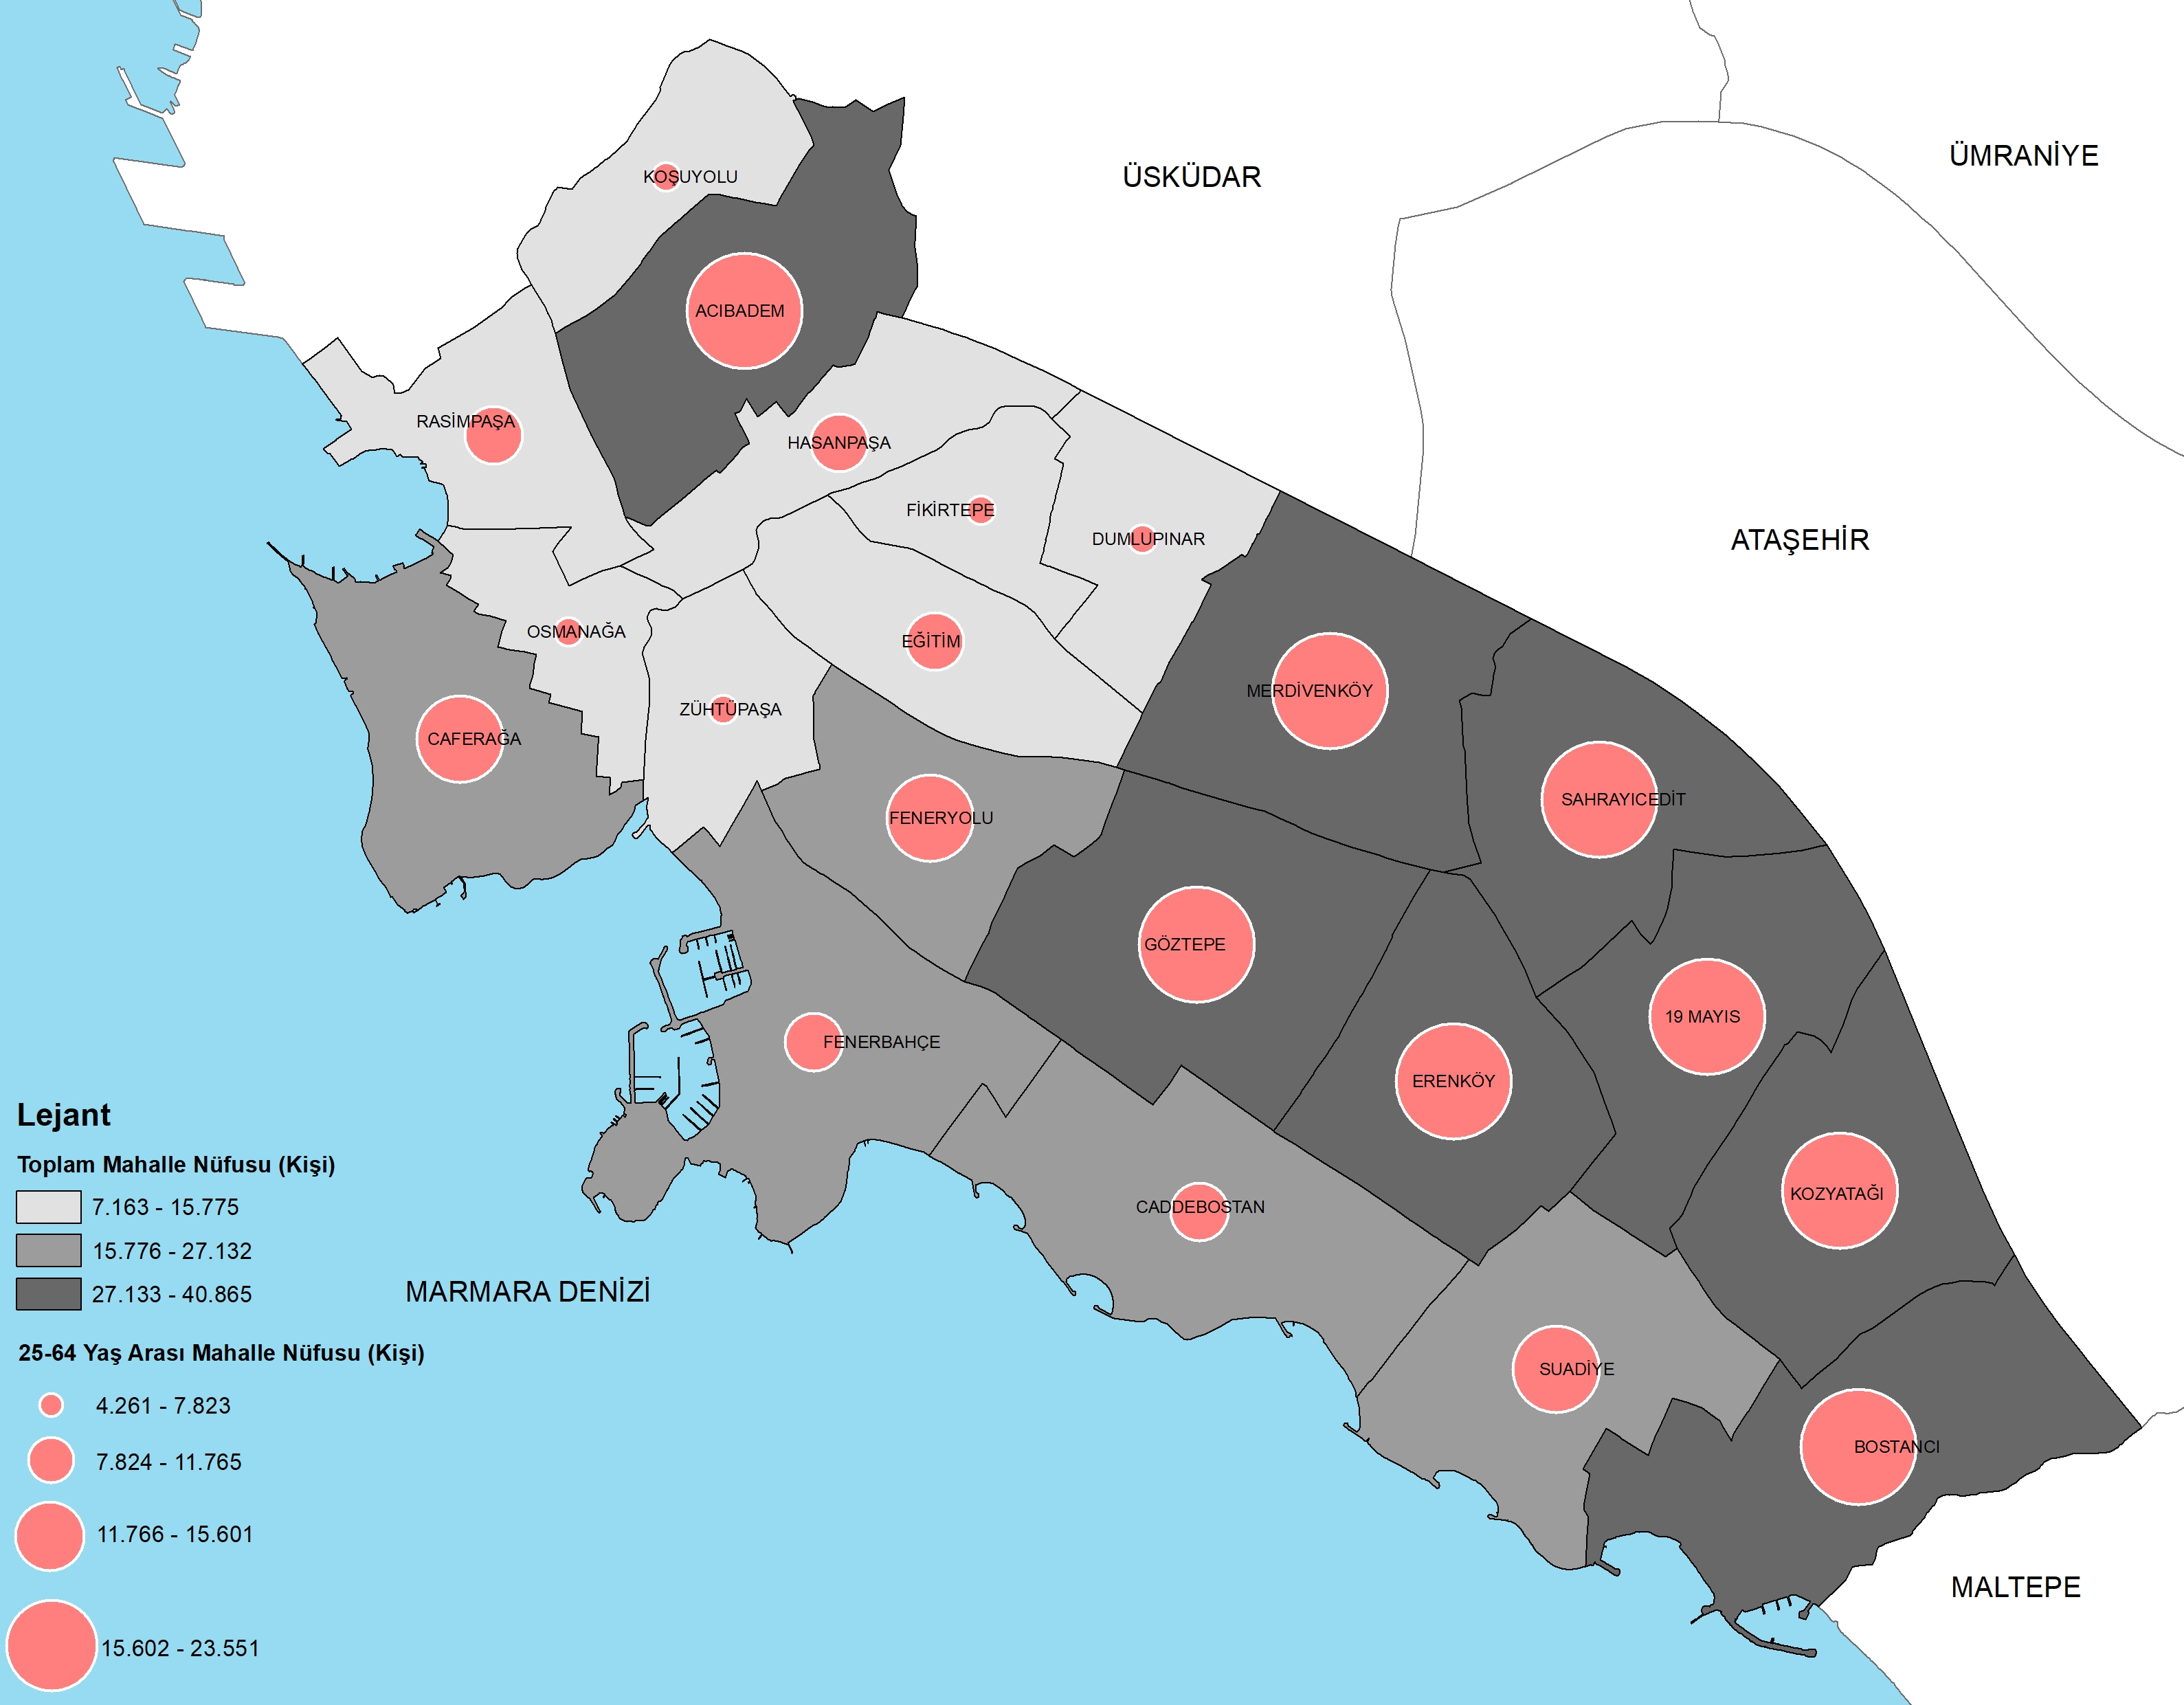

In [258]:
# import and display images
img_25_64 = Image.open('/content/drive/MyDrive/Colab Notebooks/Kadıkoy/25-64_yas-arasi_mahalle_nufusu.jpg')

display(img_25_64)

In [259]:
# convert images as dataframe manually
data_25_64 = {
    'İlçe': ['Koşuyolu', 'Acıbadem', 'Rasimpaşa','Osmanağa', 'Caferağa', 'Zühtüpaşa', 'Eğitim', 'Fikirtepe', 'Dumlupınar' , 'Feneryolu' , 'Fenerbahçe', 'Caddebostan' , 'Göztepe' , 'Merdivenköy' , 'Sahrayıcedit' , 'Erenköy', '19Mayıs' , 'Bostancı' , 'Kozyatağı', 'Suadiye'],
    'Nüfus': ["4261-7823", "15602-23551", "7824-11765", "4261-7823", "11766-15601" , "4261-7823" , "7824-11765" , "4261-7823" , "4261-7823" ,  "11766-15601" , "7824-11765" , "7824-11765" ,    "15602-23551" , "15602-23551" , "15602-23551" , "15602-23551" , "15602-23551" , "15602-23551" , "15602-23551" ,"7824-11765" ]
}
df_25_64 = pd.DataFrame(data_25_64)
# split the nüfus column into upper limit and lower limit as Alt sınır and Üst sınır

df_25_64[['Alt_Sınır', 'Üst_Sınır']] = df_25_64['Nüfus'].str.split('-', expand=True).astype(int)

# 2- PREPROCESSING

## Age 0-14

In [260]:
df_0_14.head()

Mahalle;Toplam;Erkek;Kadin
0       GÖZTEPE;4496;2363;2133
1     KOZYATAĞI;4470;2245;2225
2       ERENKÖY;4147;2126;2021
3      19 MAYIS;4037;2047;1990
4  SAHRAYICEDİT;3855;2004;1851

In [261]:
df_0_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Mahalle;Toplam;Erkek;Kadin  22 non-null     object
dtypes: object(1)
memory usage: 308.0+ bytes


In [262]:
# seperate columns from each other
df_0_14 = df_0_14['Mahalle;Toplam;Erkek;Kadin'].str.split(';', expand=True)
df_0_14.columns = ['Mahalle_0_14', 'Nüfus_0_14', 'Erkek_0_14', 'Kadin_0_14']

In [263]:
df_0_14.head()

Mahalle_0_14 Nüfus_0_14 Erkek_0_14 Kadin_0_14
0       GÖZTEPE       4496       2363       2133
1     KOZYATAĞI       4470       2245       2225
2       ERENKÖY       4147       2126       2021
3      19 MAYIS       4037       2047       1990
4  SAHRAYICEDİT       3855       2004       1851

In [264]:
# sorting rows by Mahalle_0_14
df_0_14 = df_0_14.sort_values(by='Mahalle_0_14')

In [265]:
df_0_14.head()

Mahalle_0_14 Nüfus_0_14 Erkek_0_14 Kadin_0_14
3      19 MAYIS       4037       2047       1990
7      ACIBADEM       3114       1618       1496
5      BOSTANCI       3734       1909       1825
11  CADDEBOSTAN       2258       1180       1078
12     CAFERAĞA       1627        797        830

## Age 15-24

In [266]:
df_15_24.head()

İlçe      Nüfus  Alt_Sınır  Üst_Sınır
0   Koşuyolu    634-738        634        738
1   Acıbadem  2120-2969       2120       2969
2  Rasimpaşa   739-2119        739       2119
3   Osmanağa   739-2119        739       2119
4   Caferağa   739-2119        739       2119

In [267]:
# rename the columns
df_15_24.columns = ['Mahalle_15_24', 'Nüfus_15_24', 'Alt_Sınır_15_24'	, 'Üst_Sınır_15_24' ]

In [268]:
df_15_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Mahalle_15_24    20 non-null     object
 1   Nüfus_15_24      20 non-null     object
 2   Alt_Sınır_15_24  20 non-null     int64 
 3   Üst_Sınır_15_24  20 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 772.0+ bytes


In [269]:
# adding missing datas
new_row = {'Mahalle_15_24': 'Hasanpaşa',
           'Nüfus_15_24': np.nan,
           'Alt_Sınır_15_24': np.nan,
           'Üst_Sınır_15_24': np.nan}


df_15_24.loc[len(df_15_24)] = new_row

df_15_24

Mahalle_15_24 Nüfus_15_24  Alt_Sınır_15_24  Üst_Sınır_15_24
0       Koşuyolu     634-738            634.0            738.0
1       Acıbadem   2120-2969           2120.0           2969.0
2      Rasimpaşa    739-2119            739.0           2119.0
3       Osmanağa    739-2119            739.0           2119.0
4       Caferağa    739-2119            739.0           2119.0
5      Zühtüpaşa     634-738            634.0            738.0
6         Eğitim    739-2119            739.0           2119.0
7      Fikirtepe    739-2119            739.0           2119.0
8     Dumlupınar    739-2119            739.0           2119.0
9      Feneryolu    739-2119            739.0           2119.0
10    Fenerbahçe    739-2119            739.0           2119.0
11   Caddebostan    739-2119            739.0           2119.0
12       Göztepe   2970-3465           2970.0           3465.0
13   Merdivenköy   2970-3465           2970.0           3465.0
14  Sahrayıcedit  2970-3465            2970.0           3465.0
15       Erenköy   2120-2969           2120.0           2969.0
16       19Mayıs   2120-2969           2120.0           2969.0
17      Bostancı   2120-2969           2120.0           2969.0
18     Kozyatağı   2970-3465           2970.0           3465.0
19       Suadiye    739-2119            739.0           2119.0
20     Hasanpaşa         NaN              NaN              NaN

In [270]:
# summing all values at 'Nüfus_15_24' column.
toplam_alt_sınır = df_15_24['Alt_Sınır_15_24'].sum()
toplam_üst_sınır = df_15_24['Üst_Sınır_15_24'].sum()

# adding missing datas
new_row_2 = {'Mahalle_15_24': 'Toplam',
           'Nüfus_15_24': f'{toplam_alt_sınır} - {toplam_üst_sınır}',
           'Alt_Sınır_15_24': toplam_alt_sınır,
           'Üst_Sınır_15_24': toplam_üst_sınır }

df_15_24.loc[len(df_15_24)] = new_row_2

df_15_24

Mahalle_15_24        Nüfus_15_24  Alt_Sınır_15_24  Üst_Sınır_15_24
0       Koşuyolu            634-738            634.0            738.0
1       Acıbadem          2120-2969           2120.0           2969.0
2      Rasimpaşa           739-2119            739.0           2119.0
3       Osmanağa           739-2119            739.0           2119.0
4       Caferağa           739-2119            739.0           2119.0
5      Zühtüpaşa            634-738            634.0            738.0
6         Eğitim           739-2119            739.0           2119.0
7      Fikirtepe           739-2119            739.0           2119.0
8     Dumlupınar           739-2119            739.0           2119.0
9      Feneryolu           739-2119            739.0           2119.0
10    Fenerbahçe           739-2119            739.0           2119.0
11   Caddebostan           739-2119            739.0           2119.0
12       Göztepe          2970-3465           2970.0           3465.0
13   Merdivenköy          2970-3465           2970.0           3465.0
14  Sahrayıcedit         2970-3465            2970.0           3465.0
15       Erenköy          2120-2969           2120.0           2969.0
16       19Mayıs          2120-2969           2120.0           2969.0
17      Bostancı          2120-2969           2120.0           2969.0
18     Kozyatağı          2970-3465           2970.0           3465.0
19       Suadiye           739-2119            739.0           2119.0
20     Hasanpaşa                NaN              NaN              NaN
21        Toplam  29018.0 - 48402.0          29018.0          48402.0

In [271]:
# ensure that column toplam's value is true
df_15_24["Alt_Sınır_15_24"].sum()

58036.0

In [272]:
df_15_24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mahalle_15_24    22 non-null     object 
 1   Nüfus_15_24      21 non-null     object 
 2   Alt_Sınır_15_24  21 non-null     float64
 3   Üst_Sınır_15_24  21 non-null     float64
dtypes: float64(2), object(2)
memory usage: 880.0+ bytes


In [273]:
# sum values at alt satır and ust satır and get the mean of them to create new useful column
df_15_24['Nüfus_15_24'] = (df_15_24['Alt_Sınır_15_24'] + df_15_24['Üst_Sınır_15_24']) / 2
df_15_24=df_15_24.drop(columns=['Alt_Sınır_15_24', 'Üst_Sınır_15_24'], index=1)


In [274]:
df_15_24

Mahalle_15_24  Nüfus_15_24
0       Koşuyolu        686.0
2      Rasimpaşa       1429.0
3       Osmanağa       1429.0
4       Caferağa       1429.0
5      Zühtüpaşa        686.0
6         Eğitim       1429.0
7      Fikirtepe       1429.0
8     Dumlupınar       1429.0
9      Feneryolu       1429.0
10    Fenerbahçe       1429.0
11   Caddebostan       1429.0
12       Göztepe       3217.5
13   Merdivenköy       3217.5
14  Sahrayıcedit       3217.5
15       Erenköy       2544.5
16       19Mayıs       2544.5
17      Bostancı       2544.5
18     Kozyatağı       3217.5
19       Suadiye       1429.0
20     Hasanpaşa          NaN
21        Toplam      38710.0

In [275]:
# sorting rows by Mahalle_15_24
df_15_24 = df_15_24.sort_values(by='Mahalle_15_24')

In [276]:
df_15_24

Mahalle_15_24  Nüfus_15_24
16       19Mayıs       2544.5
17      Bostancı       2544.5
11   Caddebostan       1429.0
4       Caferağa       1429.0
8     Dumlupınar       1429.0
15       Erenköy       2544.5
6         Eğitim       1429.0
10    Fenerbahçe       1429.0
9      Feneryolu       1429.0
7      Fikirtepe       1429.0
12       Göztepe       3217.5
20     Hasanpaşa          NaN
18     Kozyatağı       3217.5
0       Koşuyolu        686.0
13   Merdivenköy       3217.5
3       Osmanağa       1429.0
2      Rasimpaşa       1429.0
14  Sahrayıcedit       3217.5
19       Suadiye       1429.0
21        Toplam      38710.0
5      Zühtüpaşa        686.0

## Age 25-64

In [277]:
df_25_64

İlçe        Nüfus  Alt_Sınır  Üst_Sınır
0       Koşuyolu    4261-7823       4261       7823
1       Acıbadem  15602-23551      15602      23551
2      Rasimpaşa   7824-11765       7824      11765
3       Osmanağa    4261-7823       4261       7823
4       Caferağa  11766-15601      11766      15601
5      Zühtüpaşa    4261-7823       4261       7823
6         Eğitim   7824-11765       7824      11765
7      Fikirtepe    4261-7823       4261       7823
8     Dumlupınar    4261-7823       4261       7823
9      Feneryolu  11766-15601      11766      15601
10    Fenerbahçe   7824-11765       7824      11765
11   Caddebostan   7824-11765       7824      11765
12       Göztepe  15602-23551      15602      23551
13   Merdivenköy  15602-23551      15602      23551
14  Sahrayıcedit  15602-23551      15602      23551
15       Erenköy  15602-23551      15602      23551
16       19Mayıs  15602-23551      15602      23551
17      Bostancı  15602-23551      15602      23551
18     Kozyatağı  15602-23551      15602      23551
19       Suadiye   7824-11765       7824      11765

In [278]:
# rename the column names
df_25_64.columns = ['Mahalle_25_64', 'Nüfus_25_64', 'Alt_Sınır_25_64'	, 'Üst_Sınır_25_64' ]

In [279]:
# adding missing data
new_row_3 = {'Mahalle': 'Hasanpaşa',
           'Nüfus_25_64': np.nan,
           'Alt_Sınır_25_64': np.nan,
           'Üst_Sınır_25_64': np.nan}

df_25_64.loc[len(df_25_64)] = new_row_3

df_25_64

Mahalle_25_64  Nüfus_25_64  Alt_Sınır_25_64  Üst_Sınır_25_64
0       Koşuyolu    4261-7823           4261.0           7823.0
1       Acıbadem  15602-23551          15602.0          23551.0
2      Rasimpaşa   7824-11765           7824.0          11765.0
3       Osmanağa    4261-7823           4261.0           7823.0
4       Caferağa  11766-15601          11766.0          15601.0
5      Zühtüpaşa    4261-7823           4261.0           7823.0
6         Eğitim   7824-11765           7824.0          11765.0
7      Fikirtepe    4261-7823           4261.0           7823.0
8     Dumlupınar    4261-7823           4261.0           7823.0
9      Feneryolu  11766-15601          11766.0          15601.0
10    Fenerbahçe   7824-11765           7824.0          11765.0
11   Caddebostan   7824-11765           7824.0          11765.0
12       Göztepe  15602-23551          15602.0          23551.0
13   Merdivenköy  15602-23551          15602.0          23551.0
14  Sahrayıcedit  15602-23551          15602.0          23551.0
15       Erenköy  15602-23551          15602.0          23551.0
16       19Mayıs  15602-23551          15602.0          23551.0
17      Bostancı  15602-23551          15602.0          23551.0
18     Kozyatağı  15602-23551          15602.0          23551.0
19       Suadiye   7824-11765           7824.0          11765.0
20           NaN          NaN              NaN              NaN

In [280]:
# adding missing data
toplam_alt_sınır = df_25_64['Alt_Sınır_25_64'].sum()
toplam_üst_sınır = df_25_64['Üst_Sınır_25_64'].sum()


new_row_4 = {'Mahalle': 'Toplam',
           'Nüfus_25_64': np.nan,
           'Alt_Sınır_25_64': toplam_alt_sınır,
           'Üst_Sınır_25_64': toplam_üst_sınır }

df_25_64.loc[len(df_25_64)] = new_row_4

df_25_64

Mahalle_25_64  Nüfus_25_64  Alt_Sınır_25_64  Üst_Sınır_25_64
0       Koşuyolu    4261-7823           4261.0           7823.0
1       Acıbadem  15602-23551          15602.0          23551.0
2      Rasimpaşa   7824-11765           7824.0          11765.0
3       Osmanağa    4261-7823           4261.0           7823.0
4       Caferağa  11766-15601          11766.0          15601.0
5      Zühtüpaşa    4261-7823           4261.0           7823.0
6         Eğitim   7824-11765           7824.0          11765.0
7      Fikirtepe    4261-7823           4261.0           7823.0
8     Dumlupınar    4261-7823           4261.0           7823.0
9      Feneryolu  11766-15601          11766.0          15601.0
10    Fenerbahçe   7824-11765           7824.0          11765.0
11   Caddebostan   7824-11765           7824.0          11765.0
12       Göztepe  15602-23551          15602.0          23551.0
13   Merdivenköy  15602-23551          15602.0          23551.0
14  Sahrayıcedit  15602-23551          15602.0          23551.0
15       Erenköy  15602-23551          15602.0          23551.0
16       19Mayıs  15602-23551          15602.0          23551.0
17      Bostancı  15602-23551          15602.0          23551.0
18     Kozyatağı  15602-23551          15602.0          23551.0
19       Suadiye   7824-11765           7824.0          11765.0
20           NaN          NaN              NaN              NaN
21           NaN          NaN         208773.0         317550.0

In [281]:
df_25_64.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mahalle_25_64    20 non-null     object 
 1   Nüfus_25_64      20 non-null     object 
 2   Alt_Sınır_25_64  21 non-null     float64
 3   Üst_Sınır_25_64  21 non-null     float64
dtypes: float64(2), object(2)
memory usage: 880.0+ bytes


In [282]:
# sum values at alt satır and ust satır and get the mean of them to create new useful column
df_25_64['Nüfus_25_64'] = (df_25_64['Alt_Sınır_25_64'] + df_25_64['Üst_Sınır_25_64']) / 2
df_25_64=df_25_64.drop(columns=["Alt_Sınır_25_64", "Üst_Sınır_25_64"], index=1 )

In [283]:
# sorting rows by Mahalle_25_64
df_25_64 = df_25_64.sort_values(by='Mahalle_25_64')

## Age 65-+

In [284]:
df_65.tail()

Mahalle;Toplam;Erkek;Kadin
17      KOŞUYOLU;1269;547;722
18      OSMANAĞA;1180;483;697
19     DUMLUPINAR;944;399;545
20      FİKİRTEPE;819;355;464
21   TOPLAM;94447;36527;57920

In [285]:
df_65.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Mahalle;Toplam;Erkek;Kadin  22 non-null     object
dtypes: object(1)
memory usage: 308.0+ bytes


In [286]:
# seperate columns from each other
df_65 = df_65['Mahalle;Toplam;Erkek;Kadin'].str.split(';', expand=True)


In [287]:
# rename columns
df_65.columns = ['Mahalle_65', 'Erkek_65', 'Kadin_65', 'Toplam_65']

In [288]:
df_65.head()

Mahalle_65 Erkek_65 Kadin_65 Toplam_65
0    GÖZTEPE     9162     3433      5729
1    ERENKÖY     7732     2934      4798
2  KOZYATAĞI     7430     2847      4583
3   BOSTANCI     6801     2648      4153
4   19 MAYIS     6696     2647      4049

In [289]:
# sorting rows by Mahalle_65

df_65 = df_65.sort_values(by='Mahalle_65')

## Gender

In [290]:
df_cınsıyet.head()

Mahalle   Erkek   Kadin  Toplam
0    GÖZTEPE  17.151  22.190  39.341
1  KOZYATAĞI  16.403  20.722  37.125
2    ERENKÖY  15.145  19.539  34.684
3   BOSTANCI  14.575  18.091  32.666
4   19 MAYIS  14.370  17.794  32.164

In [291]:
df_cınsıyet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Mahalle  22 non-null     object 
 1   Erkek    22 non-null     float64
 2   Kadin    22 non-null     float64
 3   Toplam   22 non-null     float64
dtypes: float64(3), object(1)
memory usage: 836.0+ bytes


In [292]:
# sorting rows by Mahalle

df_cınsıyet = df_cınsıyet.sort_values(by='Mahalle')

## Population per year

In [293]:
df_nufus.head()

Mahalleler;2008;2009;2010;2011;2012;2013;2014;2015;2016;2017;2018;2019;2020;2021;2022
0  19 MAYIS;34450;33795;34103;33997;34161;33527;3...                                   
1  ACIBADEM;34295;33961;32119;32123;32064;31437;3...                                   
2  BOSTANCI;37061;37952;37996;37881;36587;35820;3...                                   
3  CADDEBOSTAN;20478;20810;21484;21622;21561;2042...                                   
4  CAFERAĞA;24745;23595;24381;24753;24913;24805;2...

In [294]:
df_nufus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 1 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Mahalleler;2008;2009;2010;2011;2012;2013;2014;2015;2016;2017;2018;2019;2020;2021;2022  22 non-null     object
dtypes: object(1)
memory usage: 308.0+ bytes


In [295]:
# seperate columns from each other
df_nufus = df_nufus["Mahalleler;2008;2009;2010;2011;2012;2013;2014;2015;2016;2017;2018;2019;2020;2021;2022"].str.split(';', expand=True)
# rename columns name
df_nufus.columns = ['Mahalleler__nufus', '2008', '2009' ,'2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']

In [296]:
df_nufus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Mahalleler__nufus  22 non-null     object
 1   2008               22 non-null     object
 2   2009               22 non-null     object
 3   2010               22 non-null     object
 4   2011               22 non-null     object
 5   2012               22 non-null     object
 6   2013               22 non-null     object
 7   2014               22 non-null     object
 8   2015               22 non-null     object
 9   2016               22 non-null     object
 10  2017               22 non-null     object
 11  2018               22 non-null     object
 12  2019               22 non-null     object
 13  2020               22 non-null     object
 14  2021               22 non-null     object
 15  2022               22 non-null     object
dtypes: object(16)
memory usage: 2.9+ KB


In [297]:
# sorting rows by Mahalleler__nufus
df_nufus = df_nufus.sort_values(by='Mahalleler__nufus')

In [298]:
for num_nuf in df_nufus:
  if num_nuf != "Mahalleler__nufus":
    df_nufus[num_nuf] = df_nufus[num_nuf].astype(int)


## Combined dataset

In [299]:
# display max column limitation
pd.set_option("display.max_columns", None)

In [300]:
# concatenate all columns
combined_df = pd.concat([df_0_14, df_15_24, df_25_64, df_65], axis=1)
combined_df=pd.DataFrame(combined_df)
combined_df.head()

Mahalle_0_14 Nüfus_0_14 Erkek_0_14 Kadin_0_14 Mahalle_15_24  Nüfus_15_24  \
3      19 MAYIS       4037       2047       1990      Osmanağa       1429.0   
7      ACIBADEM       3114       1618       1496     Fikirtepe       1429.0   
5      BOSTANCI       3734       1909       1825     Zühtüpaşa        686.0   
11  CADDEBOSTAN       2258       1180       1078   Caddebostan       1429.0   
12     CAFERAĞA       1627        797        830       Göztepe       3217.5   

   Mahalle_25_64  Nüfus_25_64  Mahalle_65 Erkek_65 Kadin_65 Toplam_65  
3       Osmanağa       6042.0    BOSTANCI     6801     2648      4153  
7      Fikirtepe       6042.0   FENERYOLU     6081     2230      3851  
5      Zühtüpaşa       6042.0     SUADİYE     6386     2452      3934  
11   Caddebostan       9794.5  FENERBAHÇE     5227     2015      3212  
12       Göztepe      19576.5    CAFERAĞA     4791     1742      3049

In [301]:
# drop same columns
combined_df=combined_df.drop(columns=["Mahalle_15_24", "Mahalle_25_64","Mahalle_65" ], axis=1)

In [302]:
# rename a column name
combined_df = combined_df.rename(columns={"Mahalle_0_14": "Mahalleler"})


In [303]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 3 to 17
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Mahalleler   22 non-null     object 
 1   Nüfus_0_14   22 non-null     object 
 2   Erkek_0_14   22 non-null     object 
 3   Kadin_0_14   22 non-null     object 
 4   Nüfus_15_24  20 non-null     float64
 5   Nüfus_25_64  20 non-null     float64
 6   Erkek_65     22 non-null     object 
 7   Kadin_65     22 non-null     object 
 8   Toplam_65    22 non-null     object 
dtypes: float64(2), object(7)
memory usage: 2.3+ KB


In [304]:
# data type conversion
dtype= ["Nüfus_0_14",	"Erkek_0_14"	,"Kadin_0_14",	"Nüfus_15_24"	,"Nüfus_25_64"	,"Erkek_65"	,"Kadin_65"	,"Toplam_65"]
for d in dtype:
  combined_df[d] = combined_df[d].astype(float)

In [305]:
# construct new column that contains the summary of nüfus for all age
combined_df['Toplam_nüfus'] = combined_df[['Nüfus_0_14', 'Nüfus_15_24', 'Nüfus_25_64', 'Toplam_65']].sum(axis=1)

In [306]:
# sorted the index of dataset
df_sorted = combined_df.sort_values(by='Mahalleler').reset_index(drop=True)

df_sorted[['Mahalleler']].head()


Mahalleler
0     19 MAYIS
1     ACIBADEM
2     BOSTANCI
3  CADDEBOSTAN
4     CAFERAĞA

In [307]:
# replace toplam columns place with zühtüpaşa
row1, row2 = 20, 21
df_sorted.iloc[[row1, row2]] = df_sorted.iloc[[row2, row1]].values

df_sorted

Mahalleler  Nüfus_0_14  Erkek_0_14  Kadin_0_14  Nüfus_15_24  \
0       19 MAYIS      4037.0      2047.0      1990.0       1429.0   
1       ACIBADEM      3114.0      1618.0      1496.0       1429.0   
2       BOSTANCI      3734.0      1909.0      1825.0        686.0   
3    CADDEBOSTAN      2258.0      1180.0      1078.0       1429.0   
4       CAFERAĞA      1627.0       797.0       830.0       3217.5   
5     DUMLUPINAR      1077.0       573.0       504.0       2544.5   
6        ERENKÖY      4147.0      2126.0      2021.0       1429.0   
7         EĞİTİM      1267.0       657.0       610.0       2544.5   
8     FENERBAHÇE      2341.0      1209.0      1132.0       1429.0   
9      FENERYOLU      2755.0      1438.0      1317.0       1429.0   
10     FİKİRTEPE      1448.0       702.0       746.0       3217.5   
11       GÖZTEPE      4496.0      2363.0      2133.0        686.0   
12     HASANPAŞA      1287.0       646.0       641.0       3217.5   
13     KOZYATAĞI      4470.0      2245.0      2225.0          NaN   
14      KOŞUYOLU       768.0       377.0       391.0       3217.5   
15   MERDİVENKÖY      3579.0      1819.0      1760.0       1429.0   
16      OSMANAĞA       519.0       283.0       236.0          NaN   
17     RASİMPAŞA       658.0       352.0       306.0       1429.0   
18  SAHRAYICEDİT      3855.0      2004.0      1851.0       1429.0   
19       SUADİYE      2899.0      1447.0      1452.0       1429.0   
20     ZÜHTÜPAŞA       826.0       426.0       400.0       2544.5   
21        TOPLAM     51162.0     26218.0     24944.0      38710.0   

    Nüfus_25_64  Erkek_65  Kadin_65  Toplam_65  Toplam_nüfus  
0        6042.0    6801.0    2648.0     4153.0       15661.0  
1        6042.0    6081.0    2230.0     3851.0       14436.0  
2        6042.0    6386.0    2452.0     3934.0       14396.0  
3        9794.5    5227.0    2015.0     3212.0       16693.5  
4       19576.5    4791.0    1742.0     3049.0       27470.0  
5       19576.5    1573.0     608.0      965.0       24163.0  
6        9794.5    7430.0    2847.0     4583.0       19953.5  
7       19576.5    1776.0     641.0     1135.0       24523.0  
8        9794.5    5416.0    2158.0     3258.0       16822.5  
9       13683.5    5429.0    2115.0     3314.0       21181.5  
10      19576.5    1868.0     738.0     1130.0       25372.0  
11       6042.0    9162.0    3433.0     5729.0       16953.0  
12      19576.5    1862.0     754.0     1108.0       25189.0  
13          NaN    7732.0    2934.0     4798.0        9268.0  
14      19576.5    1180.0     483.0      697.0       24259.0  
15       9794.5    6094.0    2373.0     3721.0       18523.5  
16          NaN     819.0     355.0      464.0         983.0  
17       9794.5     944.0     399.0      545.0       12426.5  
18      13683.5    6696.0    2647.0     4049.0       23016.5  
19       6042.0    5911.0    2408.0     3503.0       13873.0  
20      19576.5    1269.0     547.0      722.0       23669.0  
21     263161.5   94447.0   36527.0    57920.0      410953.5

In [308]:
df_sorted

Mahalleler  Nüfus_0_14  Erkek_0_14  Kadin_0_14  Nüfus_15_24  \
0       19 MAYIS      4037.0      2047.0      1990.0       1429.0   
1       ACIBADEM      3114.0      1618.0      1496.0       1429.0   
2       BOSTANCI      3734.0      1909.0      1825.0        686.0   
3    CADDEBOSTAN      2258.0      1180.0      1078.0       1429.0   
4       CAFERAĞA      1627.0       797.0       830.0       3217.5   
5     DUMLUPINAR      1077.0       573.0       504.0       2544.5   
6        ERENKÖY      4147.0      2126.0      2021.0       1429.0   
7         EĞİTİM      1267.0       657.0       610.0       2544.5   
8     FENERBAHÇE      2341.0      1209.0      1132.0       1429.0   
9      FENERYOLU      2755.0      1438.0      1317.0       1429.0   
10     FİKİRTEPE      1448.0       702.0       746.0       3217.5   
11       GÖZTEPE      4496.0      2363.0      2133.0        686.0   
12     HASANPAŞA      1287.0       646.0       641.0       3217.5   
13     KOZYATAĞI      4470.0      2245.0      2225.0          NaN   
14      KOŞUYOLU       768.0       377.0       391.0       3217.5   
15   MERDİVENKÖY      3579.0      1819.0      1760.0       1429.0   
16      OSMANAĞA       519.0       283.0       236.0          NaN   
17     RASİMPAŞA       658.0       352.0       306.0       1429.0   
18  SAHRAYICEDİT      3855.0      2004.0      1851.0       1429.0   
19       SUADİYE      2899.0      1447.0      1452.0       1429.0   
20     ZÜHTÜPAŞA       826.0       426.0       400.0       2544.5   
21        TOPLAM     51162.0     26218.0     24944.0      38710.0   

    Nüfus_25_64  Erkek_65  Kadin_65  Toplam_65  Toplam_nüfus  
0        6042.0    6801.0    2648.0     4153.0       15661.0  
1        6042.0    6081.0    2230.0     3851.0       14436.0  
2        6042.0    6386.0    2452.0     3934.0       14396.0  
3        9794.5    5227.0    2015.0     3212.0       16693.5  
4       19576.5    4791.0    1742.0     3049.0       27470.0  
5       19576.5    1573.0     608.0      965.0       24163.0  
6        9794.5    7430.0    2847.0     4583.0       19953.5  
7       19576.5    1776.0     641.0     1135.0       24523.0  
8        9794.5    5416.0    2158.0     3258.0       16822.5  
9       13683.5    5429.0    2115.0     3314.0       21181.5  
10      19576.5    1868.0     738.0     1130.0       25372.0  
11       6042.0    9162.0    3433.0     5729.0       16953.0  
12      19576.5    1862.0     754.0     1108.0       25189.0  
13          NaN    7732.0    2934.0     4798.0        9268.0  
14      19576.5    1180.0     483.0      697.0       24259.0  
15       9794.5    6094.0    2373.0     3721.0       18523.5  
16          NaN     819.0     355.0      464.0         983.0  
17       9794.5     944.0     399.0      545.0       12426.5  
18      13683.5    6696.0    2647.0     4049.0       23016.5  
19       6042.0    5911.0    2408.0     3503.0       13873.0  
20      19576.5    1269.0     547.0      722.0       23669.0  
21     263161.5   94447.0   36527.0    57920.0      410953.5

## Filling NaN values

In [309]:
# filling nan values with KNN
numeric_columns = df_sorted.select_dtypes(include=[np.number]).columns


imputer = KNNImputer(n_neighbors=3)
df_sorted[numeric_columns] = imputer.fit_transform(df_sorted[numeric_columns])

df_sorted

Mahalleler  Nüfus_0_14  Erkek_0_14  Kadin_0_14   Nüfus_15_24  \
0       19 MAYIS      4037.0      2047.0      1990.0   1429.000000   
1       ACIBADEM      3114.0      1618.0      1496.0   1429.000000   
2       BOSTANCI      3734.0      1909.0      1825.0    686.000000   
3    CADDEBOSTAN      2258.0      1180.0      1078.0   1429.000000   
4       CAFERAĞA      1627.0       797.0       830.0   3217.500000   
5     DUMLUPINAR      1077.0       573.0       504.0   2544.500000   
6        ERENKÖY      4147.0      2126.0      2021.0   1429.000000   
7         EĞİTİM      1267.0       657.0       610.0   2544.500000   
8     FENERBAHÇE      2341.0      1209.0      1132.0   1429.000000   
9      FENERYOLU      2755.0      1438.0      1317.0   1429.000000   
10     FİKİRTEPE      1448.0       702.0       746.0   3217.500000   
11       GÖZTEPE      4496.0      2363.0      2133.0    686.000000   
12     HASANPAŞA      1287.0       646.0       641.0   3217.500000   
13     KOZYATAĞI      4470.0      2245.0      2225.0   1181.333333   
14      KOŞUYOLU       768.0       377.0       391.0   3217.500000   
15   MERDİVENKÖY      3579.0      1819.0      1760.0   1429.000000   
16      OSMANAĞA       519.0       283.0       236.0   1429.000000   
17     RASİMPAŞA       658.0       352.0       306.0   1429.000000   
18  SAHRAYICEDİT      3855.0      2004.0      1851.0   1429.000000   
19       SUADİYE      2899.0      1447.0      1452.0   1429.000000   
20     ZÜHTÜPAŞA       826.0       426.0       400.0   2544.500000   
21        TOPLAM     51162.0     26218.0     24944.0  38710.000000   

      Nüfus_25_64  Erkek_65  Kadin_65  Toplam_65  Toplam_nüfus  
0     6042.000000    6801.0    2648.0     4153.0       15661.0  
1     6042.000000    6081.0    2230.0     3851.0       14436.0  
2     6042.000000    6386.0    2452.0     3934.0       14396.0  
3     9794.500000    5227.0    2015.0     3212.0       16693.5  
4    19576.500000    4791.0    1742.0     3049.0       27470.0  
5    19576.500000    1573.0     608.0      965.0       24163.0  
6     9794.500000    7430.0    2847.0     4583.0       19953.5  
7    19576.500000    1776.0     641.0     1135.0       24523.0  
8     9794.500000    5416.0    2158.0     3258.0       16822.5  
9    13683.500000    5429.0    2115.0     3314.0       21181.5  
10   19576.500000    1868.0     738.0     1130.0       25372.0  
11    6042.000000    9162.0    3433.0     5729.0       16953.0  
12   19576.500000    1862.0     754.0     1108.0       25189.0  
13    6042.000000    7732.0    2934.0     4798.0        9268.0  
14   19576.500000    1180.0     483.0      697.0       24259.0  
15    9794.500000    6094.0    2373.0     3721.0       18523.5  
16    7292.833333     819.0     355.0      464.0         983.0  
17    9794.500000     944.0     399.0      545.0       12426.5  
18   13683.500000    6696.0    2647.0     4049.0       23016.5  
19    6042.000000    5911.0    2408.0     3503.0       13873.0  
20   19576.500000    1269.0     547.0      722.0       23669.0  
21  263161.500000   94447.0   36527.0    57920.0      410953.5

In [310]:
# Function to keep only the first digit after the decimal point in floats.
def keep_first_decimal(value):
    if isinstance(value, float):
        return float(f"{int(value)}.{str(value).split('.')[1][0]}")
    return value


columns_to_process = ['Nüfus_15_24', 'Nüfus_25_64']
df_sorted[columns_to_process] = df_sorted[columns_to_process].applymap(keep_first_decimal)

df_sorted

<ipython-input-310-e19c1e431ac1>:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_sorted[columns_to_process] = df_sorted[columns_to_process].applymap(keep_first_decimal)


Mahalleler  Nüfus_0_14  Erkek_0_14  Kadin_0_14  Nüfus_15_24  \
0       19 MAYIS      4037.0      2047.0      1990.0       1429.0   
1       ACIBADEM      3114.0      1618.0      1496.0       1429.0   
2       BOSTANCI      3734.0      1909.0      1825.0        686.0   
3    CADDEBOSTAN      2258.0      1180.0      1078.0       1429.0   
4       CAFERAĞA      1627.0       797.0       830.0       3217.5   
5     DUMLUPINAR      1077.0       573.0       504.0       2544.5   
6        ERENKÖY      4147.0      2126.0      2021.0       1429.0   
7         EĞİTİM      1267.0       657.0       610.0       2544.5   
8     FENERBAHÇE      2341.0      1209.0      1132.0       1429.0   
9      FENERYOLU      2755.0      1438.0      1317.0       1429.0   
10     FİKİRTEPE      1448.0       702.0       746.0       3217.5   
11       GÖZTEPE      4496.0      2363.0      2133.0        686.0   
12     HASANPAŞA      1287.0       646.0       641.0       3217.5   
13     KOZYATAĞI      4470.0      2245.0      2225.0       1181.3   
14      KOŞUYOLU       768.0       377.0       391.0       3217.5   
15   MERDİVENKÖY      3579.0      1819.0      1760.0       1429.0   
16      OSMANAĞA       519.0       283.0       236.0       1429.0   
17     RASİMPAŞA       658.0       352.0       306.0       1429.0   
18  SAHRAYICEDİT      3855.0      2004.0      1851.0       1429.0   
19       SUADİYE      2899.0      1447.0      1452.0       1429.0   
20     ZÜHTÜPAŞA       826.0       426.0       400.0       2544.5   
21        TOPLAM     51162.0     26218.0     24944.0      38710.0   

    Nüfus_25_64  Erkek_65  Kadin_65  Toplam_65  Toplam_nüfus  
0        6042.0    6801.0    2648.0     4153.0       15661.0  
1        6042.0    6081.0    2230.0     3851.0       14436.0  
2        6042.0    6386.0    2452.0     3934.0       14396.0  
3        9794.5    5227.0    2015.0     3212.0       16693.5  
4       19576.5    4791.0    1742.0     3049.0       27470.0  
5       19576.5    1573.0     608.0      965.0       24163.0  
6        9794.5    7430.0    2847.0     4583.0       19953.5  
7       19576.5    1776.0     641.0     1135.0       24523.0  
8        9794.5    5416.0    2158.0     3258.0       16822.5  
9       13683.5    5429.0    2115.0     3314.0       21181.5  
10      19576.5    1868.0     738.0     1130.0       25372.0  
11       6042.0    9162.0    3433.0     5729.0       16953.0  
12      19576.5    1862.0     754.0     1108.0       25189.0  
13       6042.0    7732.0    2934.0     4798.0        9268.0  
14      19576.5    1180.0     483.0      697.0       24259.0  
15       9794.5    6094.0    2373.0     3721.0       18523.5  
16       7292.8     819.0     355.0      464.0         983.0  
17       9794.5     944.0     399.0      545.0       12426.5  
18      13683.5    6696.0    2647.0     4049.0       23016.5  
19       6042.0    5911.0    2408.0     3503.0       13873.0  
20      19576.5    1269.0     547.0      722.0       23669.0  
21     263161.5   94447.0   36527.0    57920.0      410953.5

In [311]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mahalleler    22 non-null     object 
 1   Nüfus_0_14    22 non-null     float64
 2   Erkek_0_14    22 non-null     float64
 3   Kadin_0_14    22 non-null     float64
 4   Nüfus_15_24   22 non-null     float64
 5   Nüfus_25_64   22 non-null     float64
 6   Erkek_65      22 non-null     float64
 7   Kadin_65      22 non-null     float64
 8   Toplam_65     22 non-null     float64
 9   Toplam_nüfus  22 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.8+ KB


# 3 - ANALYSIS

## Total population distribution per age group at Kadıköy

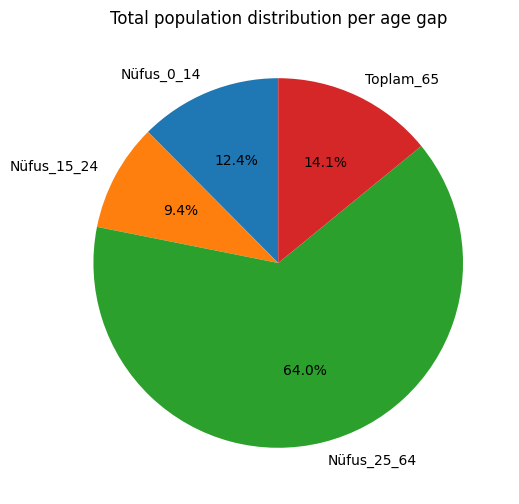

In [312]:

toplam_row = df_sorted.loc[df_sorted['Mahalleler'] == 'TOPLAM', ['Nüfus_0_14', 'Nüfus_15_24', 'Nüfus_25_64', 'Toplam_65']]

labels = toplam_row.columns
sizes = toplam_row.values.flatten()
plt.figure(figsize=(6,6))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Total population distribution per age gap')
plt.show()

## Mahalles population based on per age

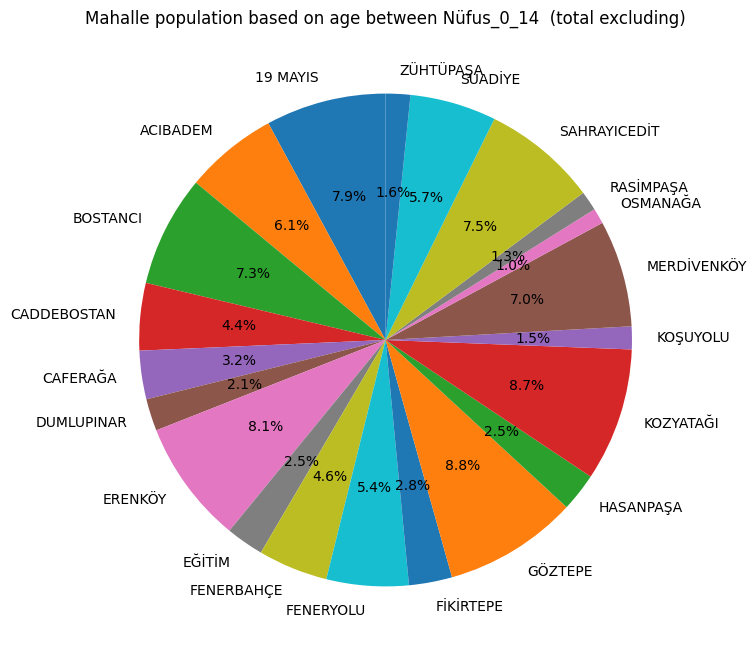

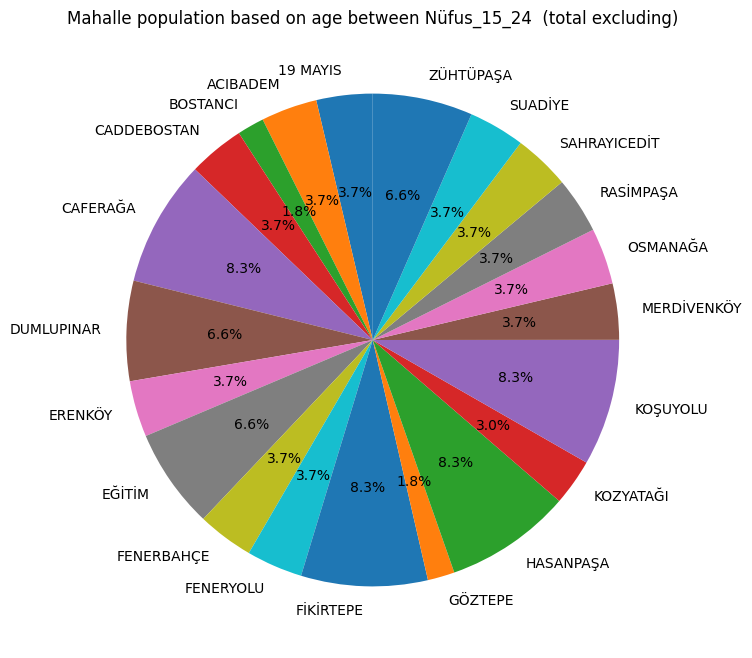

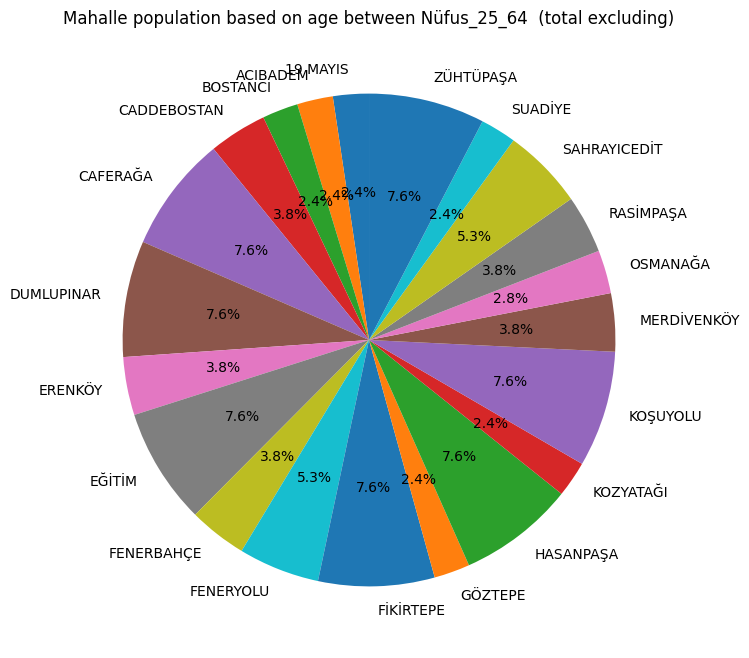

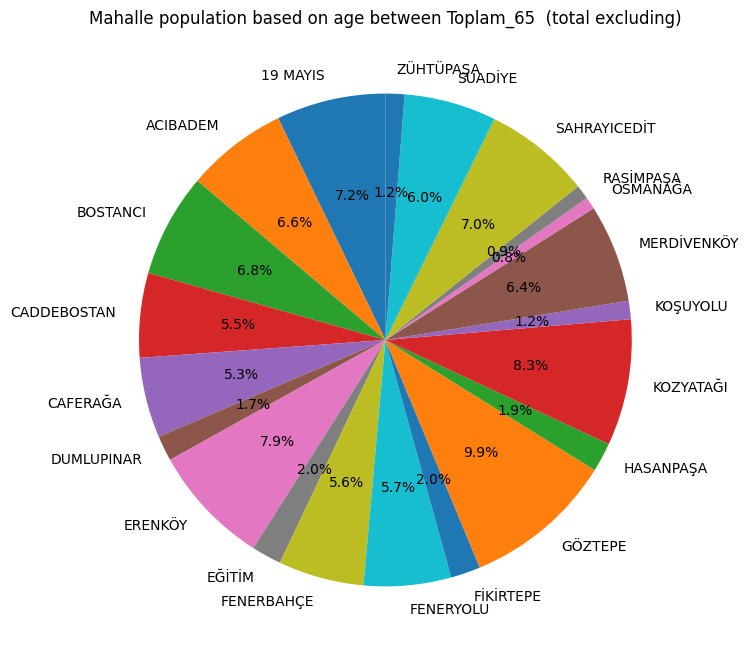

In [313]:

age_groups = ['Nüfus_0_14', 'Nüfus_15_24', 'Nüfus_25_64', 'Toplam_65']

for age_group in age_groups:
    total_population_by_age_group = df_sorted[df_sorted['Mahalleler'] != 'TOPLAM'].groupby('Mahalleler')[age_group].sum()

    labels = total_population_by_age_group.index
    sizes = total_population_by_age_group.values

    plt.figure(figsize=(8,8))

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Mahalle population based on age between {age_group}  (total excluding)')
    plt.show()

## Mahalle popluation change based on year

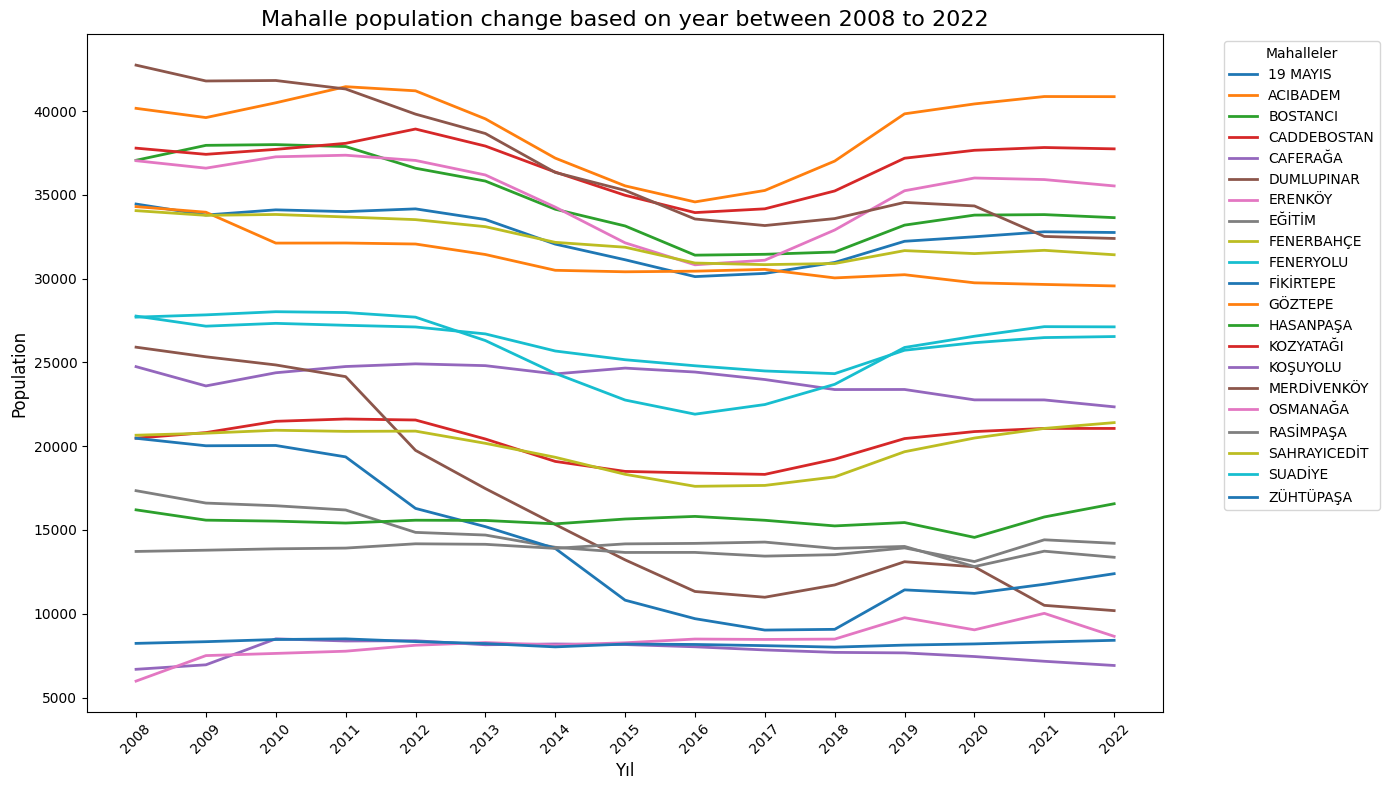

In [314]:
import matplotlib.pyplot as plt

df_nufus_filtered = df_nufus[df_nufus['Mahalleler__nufus'] != 'TOPLAM']

years = [str(year) for year in range(2008, 2023)]

plt.figure(figsize=(14, 8))

for index, row in df_nufus_filtered.iterrows():
    plt.plot(years, row[years], label=row['Mahalleler__nufus'], linewidth=2)

plt.title('Mahalle population change based on year between 2008 to 2022', fontsize=16)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Population', fontsize=12)

plt.xticks(rotation=45)
plt.legend(title="Mahalleler", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Gender based on mahalle

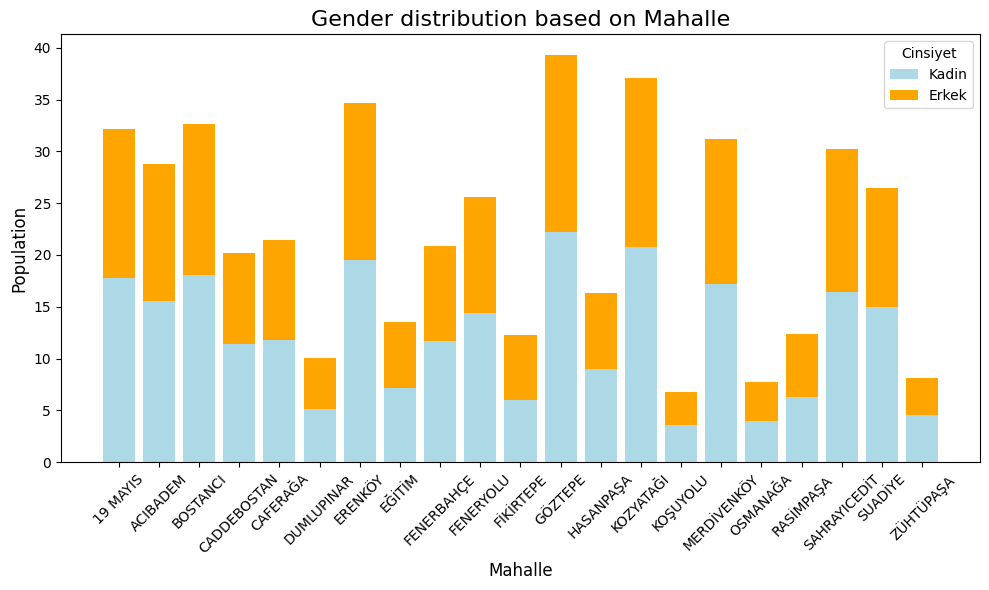

In [315]:
df_cinsiyet_filtered = df_cınsıyet[df_cınsıyet['Mahalle'] != 'TOPLAM']
plt.figure(figsize=(10, 6))
plt.bar(df_cinsiyet_filtered['Mahalle'], df_cinsiyet_filtered['Kadin'], label='Kadin', color='lightblue')
plt.bar(df_cinsiyet_filtered['Mahalle'], df_cinsiyet_filtered['Erkek'], bottom=df_cinsiyet_filtered['Kadin'], label='Erkek', color='orange')

plt.title('Gender distribution based on Mahalle', fontsize=16)
plt.xlabel('Mahalle', fontsize=12)
plt.ylabel('Population', fontsize=12)
plt.legend(title='Cinsiyet')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
